In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
import seaborn as sns
%matplotlib inline


In [112]:
train_df = pd.read_csv('train_loan.csv' , delimiter = ',' ,header = 0 )
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [66]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [113]:
train_df.shape

(614, 13)

In [114]:
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(train_df.dtypes)
Data_dict

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [115]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = train_df.isnull().sum()
Data_dict

,0,MissingVal
Loan_ID,object,0
Gender,object,13
Married,object,3
Dependents,object,15
Education,object,0
Self_Employed,object,32
ApplicantIncome,int64,0
CoapplicantIncome,float64,0
LoanAmount,float64,22
Loan_Amount_Term,float64,14


In [116]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.

Data_dict['UniqueVal'] = train_df.nunique()
Data_dict

,0,MissingVal,UniqueVal
Loan_ID,object,0,614
Gender,object,13,2
Married,object,3,2
Dependents,object,15,4
Education,object,0,2
Self_Employed,object,32,2
ApplicantIncome,int64,0,505
CoapplicantIncome,float64,0,287
LoanAmount,float64,22,203
Loan_Amount_Term,float64,14,10


In [117]:
# identifying count of the variable.

Data_dict['Count'] = train_df.count()
Data_dict

,0,MissingVal,UniqueVal,Count
Loan_ID,object,0,614,614
Gender,object,13,2,601
Married,object,3,2,611
Dependents,object,15,4,599
Education,object,0,2,614
Self_Employed,object,32,2,582
ApplicantIncome,int64,0,505,614
CoapplicantIncome,float64,0,287,614
LoanAmount,float64,22,203,592
Loan_Amount_Term,float64,14,10,600


In [118]:
# renaming the first column using rename()

Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
Loan_ID,object,0,614,614
Gender,object,13,2,601
Married,object,3,2,611
Dependents,object,15,4,599
Education,object,0,2,614
Self_Employed,object,32,2,582
ApplicantIncome,int64,0,505,614
CoapplicantIncome,float64,0,287,614
LoanAmount,float64,22,203,592
Loan_Amount_Term,float64,14,10,600


In [119]:
train_df[train_df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [120]:
train_df.Gender.fillna(method = 'ffill' , inplace = True)

In [121]:
train_df.Married.fillna(method = 'ffill' , inplace = True)

In [122]:
train_df.Dependents.fillna(method = 'ffill' , inplace = True)

In [123]:
train_df.Self_Employed.fillna(method = 'ffill' , inplace = True)

In [124]:
train_df.LoanAmount.fillna(value = 146.412162 , inplace = True)

In [125]:
train_df.Loan_Amount_Term.fillna(value = 342.00000 , inplace = True)

In [126]:
train_df.Credit_History.fillna(method = 'ffill' , inplace = True)

In [127]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'densit

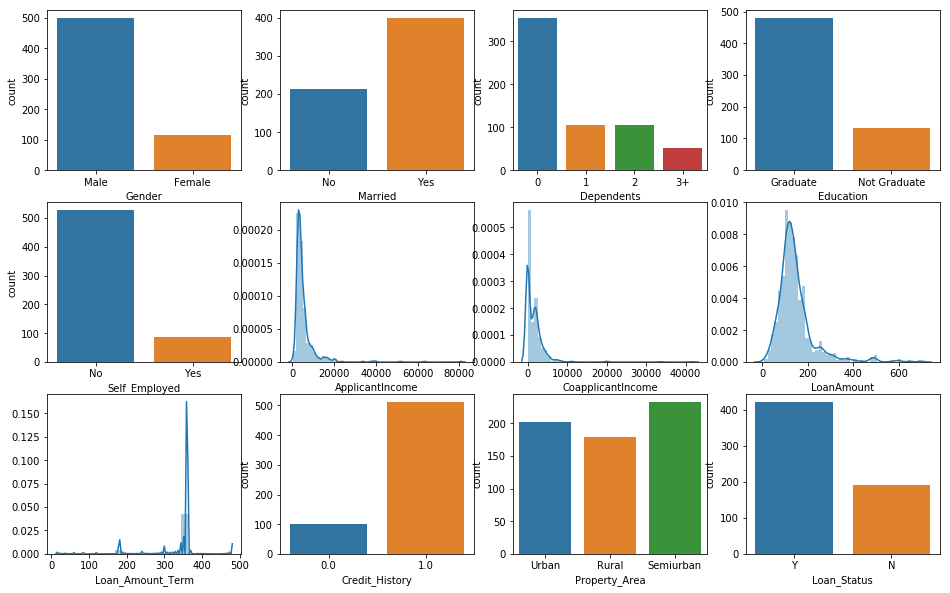

In [128]:
fig , axes = plt.subplots(3, 4, figsize = (16,10) )
sns.countplot('Gender' , data = train_df, ax = axes[0,0])
sns.countplot('Married' , data = train_df, ax = axes[0,1])
sns.countplot('Dependents' , data = train_df, ax = axes[0,2])
sns.countplot('Education' , data = train_df, ax = axes[0,3])
sns.countplot('Self_Employed' , data = train_df, ax = axes[1,0])
sns.distplot(train_df['ApplicantIncome'] ,kde = True, ax = axes[1,1])
sns.distplot(train_df['CoapplicantIncome'] , kde = True , ax = axes[1,2])
sns.distplot(train_df['LoanAmount'] , kde = True , ax = axes[1,3])
sns.distplot(train_df['Loan_Amount_Term'] , kde = True , ax = axes[2,0])
sns.countplot('Credit_History' , data = train_df, ax = axes[2,1])
sns.countplot('Property_Area' , data = train_df, ax = axes[2,2])
sns.countplot('Loan_Status' , data = train_df, ax = axes[2,3])


In [129]:
train_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [130]:
le = prep.LabelEncoder()

In [131]:

le.fit(train_df.Loan_Status)
le.classes_

array(['N', 'Y'], dtype=object)

In [132]:
Loan_Status_le = le.transform(train_df.Loan_Status)

In [133]:
Loan_Status_le[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [134]:
train_df.Loan_Status = Loan_Status_le

In [135]:
le.fit(train_df.Gender)
le.classes_

array(['Female', 'Male'], dtype=object)

In [136]:
Gender_le = le.transform(train_df.Gender)
Gender_le[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [137]:
train_df.Gender = Gender_le

In [138]:
le.fit(train_df.Married)
le.classes_

array(['No', 'Yes'], dtype=object)

In [139]:
Married_le = le.transform(train_df.Married)

In [141]:
train_df.Married = Married_le

In [144]:
le.fit(train_df.Dependents)
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

In [146]:
Dependents_le = le.transform(train_df.Dependents)
Dependents_le[:10]

array([0, 1, 0, 0, 0, 2, 0, 3, 2, 1], dtype=int64)

In [147]:
train_df.Dependents = Dependents_le

In [152]:
le.fit(train_df.Education)
le.classes_
Education_le = le.transform(train_df.Education)
train_df.Education = Education_le
train_df.Education[:10]

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: Education, dtype: int64

In [154]:
le.fit(train_df.Self_Employed)
Self_Employed_le = le.transform(train_df.Self_Employed)
train_df.Self_Employed = Self_Employed_le
train_df.Self_Employed[:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Self_Employed, dtype: int64

In [156]:
le.fit(train_df.Credit_History)
Credit_History_le = le.transform(train_df.Credit_History)
train_df.Credit_History = Credit_History_le
train_df.Credit_History[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: Credit_History, dtype: int64

In [159]:
le.fit(train_df.Property_Area)
Property_Area_le = le.transform(train_df.Property_Area)
train_df.Property_Area = Property_Area_le
train_df.Property_Area[:10]

0    2
1    0
2    2
3    2
4    2
5    2
6    2
7    1
8    2
9    1
Name: Property_Area, dtype: int64

In [160]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1,1,0
